In [1]:
%cd ..

d:\github\ripple_heterogeneity\python


In [4]:
import pandas as pd
import numpy as np 
# import glob
import matplotlib.pyplot as plt

import sys,os

import functions, loading

import nelpy as nel  # main nelpy imports
# import nelpy.plotting as npl  # optional plotting import

# import math
import seaborn as sns
from tqdm import tqdm

from matplotlib.ticker import AutoMinorLocator

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [7]:
def load_basic_data(basepath):
    nChannels, fs, fs_dat, shank_to_channel = functions.loadXML(basepath)
    ripples = loading.load_ripples_events(basepath)
    cell_metrics,data = loading.load_cell_metrics(basepath)
    return cell_metrics,data,ripples,fs_dat

basepath = r'A:\Data\AYA9\day20'

cell_metrics,data,ripples,fs_dat = load_basic_data(basepath)

restrict_idx = ((cell_metrics.putativeCellType == "Pyramidal Cell") &
                    ((cell_metrics.brainRegion=="CA1") |
                    (cell_metrics.brainRegion=="rCA1") |
                    (cell_metrics.brainRegion=="lCA1")))
# restric cell metrics                      
cell_metrics = cell_metrics[restrict_idx]
# get ripple epochs
ripple_epochs = nel.EpochArray([np.array([ripples.start,ripples.stop]).T])

# idx = (cell_metrics.deepSuperficial=="Superficial")
st_unit = nel.SpikeTrainArray(timestamps=np.array(data['spikes'],dtype=object)[restrict_idx], fs=fs_dat)



C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:709: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [70]:
st_rip_unit = st_unit[ripple_epochs]
# st_rip_unit.label = cell_metrics.deepSuperficial

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


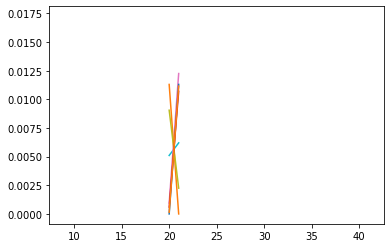

In [110]:
sup_idx = cell_metrics.deepSuperficial=="Superficial"
# print(sup_idx)
# for rip in st_rip_unit:
#     for unit in rip.data[sup_idx]:
#         rip.data

rip = st_rip_unit[0]
rip.data
isi = np.empty((rip.data.shape[0],rip.data.shape[0],))
isi[:] = np.nan
for i in range(rip.data.shape[0]):
    if len(rip.data[i]) == 0:
        continue  
    for j in np.arange(1,rip.data.shape[0]):
        if len(rip.data[j]) == 0:
            continue   
        isi[i,j] = np.abs(np.min(rip.data[i] - rip.data[j]))
plt.plot(isi.T)
plt.show()
# isi
# rip.data[0][0]
# temp_bin = rip.bin(ds=0.001)
# plt.imshow(temp_bin.data[sup_idx,:])
# np.where(temp_bin.data[sup_idx,:]>0)
# for unit in temp_bin.data[sup_idx,:]:
#     unit.
# for unit in rip.data[sup_idx]:
#     print(unit)

# st_rip_unit[0].data[sup_idx]
# st_rip_unit[0].label
# st_rip_unit.

# unit_ids_to_keep = list(unit_ids_to_keep)

# # modify spike trains and ratemap to only include those units that passed all the criteria
# sta_placecells = st._unit_subset(unit_ids_to_keep)

In [127]:
spiketimes = []
for unit in rip.data:
    if len(unit) > 0:
        spiketimes.append(min(unit)) 
    else:
        spiketimes.append(np.nan) 
spiketimes = np.array(spiketimes)    

isi_sup = []
for i in range(len(np.array(spiketimes))):
    isi_sup.append(np.abs(spiketimes[i] - spiketimes[sup_idx]))

In [128]:
isi_sup

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]),
 array([    nan,     nan,     nan,     nan,     nan,     nan, 0.00395,
            nan,     nan, 0.0045 ,     nan,     nan,     nan,     nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [68]:
r,c = np.where(temp_bin.data[sup_idx,:]>0)

temp_bin.data[sup_idx,:]
print(r)
print(c)

[6 9]
[ 7 15]
